In [116]:
import numpy as np
from numpy import sin, log
from scipy.integrate import odeint,simps
import numpy.ma as ma
import matplotlib.pyplot as plt

In [363]:
#create grid
Ndim=np.arange(-4,4+0.01,0.01)
X,Y=np.meshgrid(Ndim,Ndim,indexing='ij')
Z=X+Y*1j


In [370]:
def F(X,Y,m=0.06577949225902557,angle= np.pi/4):
    z=X+1j*Y;
    a=1+m;
    z=0.5*(z+np.sqrt(z-2)*np.sqrt(z+2))
    circulation=4*np.pi*a*sin(angle) # hard code l at 4 and tc/l at 8/100    
    K=1j*circulation*log((z+m)/a)/(2*np.pi)
    z = ma.masked_where(np.absolute(z+m)<=a, z) # mask the inner circle
    z+=m
    res= z*np.exp(-1j*angle)+(a**2*np.exp(1j*angle))/(z)+K
    
    return res.real,res.imag,res
# def F(X,Y,m=0.06577949225902557,angle= 0*np.pi/4):
#     z=X+1j*Y;
#     a=1+m;
#     z=0.5*(z+np.sqrt(z-2)*np.sqrt(z+2))
#     z = ma.masked_where(np.absolute(z+m)<=a, z) # mask the inner circle
#     z+=m
#     circulation=1j*a*sin(angle)*log(z/a)/(2*np.pi)
#     res= z*np.exp(-1j*angle)+(a**2*np.exp(1j*angle))/z+circulation
#     return res.real,res.imag,res

def Jokowski(z):
    res=z+1/z
    return res.real,res.imag,res


<ipython-input-372-fd85398e43b4>:8: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  plt.contour(X,Y,psi,80,color="r",label="$\phi?$")


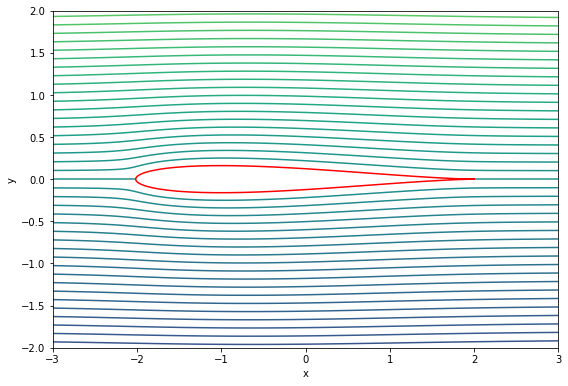

In [372]:
plt.figure(figsize=(8,8))
theta = np.arange(0, 2*np.pi+0.1, 0.1)
m=0.06577949225902557
phi,psi,Z=F(X,Y,m=m,angle=0*np.pi/180)
z = (1+m)*np.exp(1j*theta)-m
# plt.plot(z.real,z.imag,c="k")
_,_,z=Jokowski(z)
plt.contour(X,Y,psi,80,color="r",label="$\phi?$")
plt.plot(z.real,z.imag,c="r")

plt.ylim((-2,2))
plt.xlim((-3,3))
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.gca().set_aspect('equal')
# plt.colorbar()
# plt.savefig("../images/8p_P4_nocirc.png",dpi=200,bbox_inches='tight')


In [318]:
xi=z
(xi.real.max()-xi.real.min())

4.01373753117076

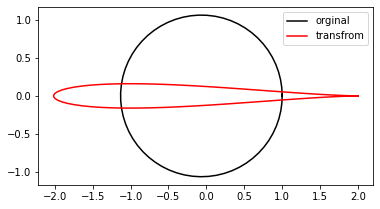

In [3]:
theta = np.arange(0, 2*np.pi+0.1, 0.1)
m=0.06577949225902557



z = (1+m)*np.exp(1j*theta)-m

fig, axs = plt.subplots(1, 1, sharex=True, sharey=True)
axs.plot(np.real(z), np.imag(z),c="k",label="orginal")
axs.set_aspect(1)
xi = z + 1.0 / z
axs.plot(np.real(xi), np.imag(xi),c="r",label="transfrom")
axs.set_aspect(1)
plt.legend()